In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [63]:
! wget https://www.dropbox.com/sh/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja -O data

--2023-07-20 07:59:59--  https://www.dropbox.com/sh/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /sh/raw/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja [following]
--2023-07-20 07:59:59--  https://www.dropbox.com/sh/raw/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf9341e70c62b24e3aa2babeb3d.dl.dropboxusercontent.com/zip_download_get/BjmSFqjBsSu2ok8ze4eWDO0uG5flTFuKNJzi6pTWKeIIR-bXjhNOh4rcrWm0zFP7uLDhXAhaAf15fzPU4v_-38dTl6otDa8Kjutq5IkpL58dQA# [following]
--2023-07-20 08:00:01--  https://ucf9341e70c62b24e3aa2babeb3d.dl.dropboxusercontent.com/zip_download_get/BjmSFqjBsSu2ok8ze4eWDO0uG5flTFuKNJzi6pTWKeIIR-bXjhNOh4rcrWm0zFP7uLDhXAhaAf15fzPU4v_-38dTl6otDa8Kj

In [64]:
!unzip data -d "images/"

Archive:  data
mapname:  conversion of  failed
replace images/Train/Pikachu/345.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [65]:
pip install keras_preprocessing

In [66]:
classes = os.listdir("images/Train")

In [67]:
classes

['Pikachu', 'Bulbasaur', 'Charmander']

In [68]:
for pokemon_type in classes:
  path = "images/Train/" + pokemon_type
  print(f"{pokemon_type} - {len(os.listdir(path))}")

Pikachu - 101
Bulbasaur - 101
Charmander - 102


In [69]:
for pokemon_type in classes:
  path = "images/Test/" + pokemon_type
  print(f"{pokemon_type} - {len(os.listdir(path))}")

Pikachu - 40
Bulbasaur - 41
Charmander - 42


In [70]:
from keras_preprocessing import image

In [71]:
train_data = []
train_labels = []

In [72]:
for category in classes:
  folder = f"images/Train/{category}"
  for image_name in os.listdir(folder):
    img_path = os.path.join(folder, image_name)

    img = image.load_img(img_path, target_size=(100,100))
    img_array = image.img_to_array(img)
    train_data.append(img_array)
    train_labels.append(category)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [73]:
len(train_data)

304

In [74]:
train_data = np.array(train_data)
train_labels = np.array(train_labels)

In [75]:
train_data = train_data.reshape(len(train_data), 30000)

In [76]:
train_data.shape

(304, 30000)

In [77]:
category2label = {"Pikachu": 0, "Charmander":1, "Bulbasaur":2}
label2category = {0:"Pikachu", 1:"Charmander", 2:"Bulbasaur"}

In [78]:
train_labels = np.array([category2label[label] for label in train_labels])

In [79]:
from keras.utils import to_categorical

In [80]:
train_labels = to_categorical(train_labels)

In [81]:
train_labels

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [82]:
from keras.layers import Dense
from keras import Sequential

In [83]:
features = train_data.shape[1]

In [84]:
model = Sequential()

In [85]:
model.add( Dense(units=512, activation='relu', input_shape=(features,)))

In [86]:
model.add( Dense(units=256, activation='relu'))

In [87]:
model.add( Dense(units=128, activation='relu'))

In [88]:
model.add( Dense(units=64, activation='relu'))

In [89]:
model.add( Dense(units=3, activation='softmax'))

In [90]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [91]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               15360512  
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 3)                 195       
                                                                 
Total params: 15,533,187
Trainable params: 15,533,187
Non-trainable params: 0
_________________________________________________________________


In [92]:
model.fit(train_data, train_labels, batch_size=32, epochs=50)

Epoch 1/50
10/10 [==============================] - 4s 268ms/step - loss: 2544.8674 - accuracy: 0.3618
Epoch 2/50
10/10 [==============================] - 2s 168ms/step - loss: 1502.3148 - accuracy: 0.4243
Epoch 3/50
10/10 [==============================] - 3s 270ms/step - loss: 975.1882 - accuracy: 0.4605
Epoch 4/50
10/10 [==============================] - 3s 272ms/step - loss: 487.0079 - accuracy: 0.5691
Epoch 5/50
10/10 [==============================] - 3s 319ms/step - loss: 197.6686 - accuracy: 0.7237
Epoch 6/50
10/10 [==============================] - 3s 320ms/step - loss: 54.1139 - accuracy: 0.8586
Epoch 7/50
10/10 [==============================] - 3s 266ms/step - loss: 69.9990 - accuracy: 0.8553
Epoch 8/50
10/10 [==============================] - 2s 195ms/step - loss: 151.3949 - accuracy: 0.7533
Epoch 9/50
10/10 [==============================] - 2s 157ms/step - loss: 262.0505 - accuracy: 0.7303
Epoch 10/50
10/10 [==============================] - 2s 162ms/step - loss: 195.778

In [94]:
test_image = "/content/pikachu.png"

img = image.load_img(test_image, target_size=(100, 100))
img = image.img_to_array(img)
img.shape

(100, 100, 3)

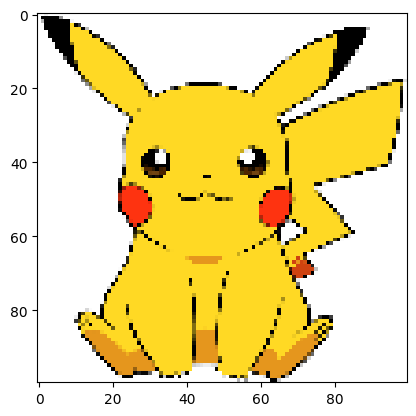

In [95]:
plt.imshow(img.astype('int'));

In [96]:
img = img.reshape(1, 30000)

In [97]:
model.predict(img).argmax()

1/1 [==============================] - 0s 69ms/step


0

In [98]:
pred = label2category[model.predict(img).argmax()]
pred

1/1 [==============================] - 0s 23ms/step


'Pikachu'